# HW 10: Supervised Learning with scikit-learn


This homework assignment is slightly different from our usual homework assignments. Since this assignment will be manually graded (not auto-graded as usual), there is no such thing as unlimited attempts. You can submit the hw as many times as needed before the deadline, but **only the last submission will be graded**.

However, there will be 20 buffer points. That is, in total, there are 120 points in this homework, but the maximum grade is 100 points. For example, if you get 95 points, then your hw10 grade will be 95/100. If you get 115 points, your hw10 grade will be 100/100.

**Deadline: 11:59 PM Wednesday 12/08/2021**

***

## 1. Regression


In this section, we will work with the Tips Dataset that we have previously worked on in HW 9. Load the data using [this link](https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/tips.csv).


In [32]:
# load the data
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
tips = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


- **The goal of this analysis: to predict the amount of tip based on the rest of the data.**

### Exercise 1 (20 points)

- 1.1 Plot the relationship between the response variable and each of the features.
- 1.2 Divide the data into training data and testing data (set `random_state=430`).
- 1.3 Fit a Linear Regression model to the training data.
- 1.4 Use the fitted model to predict the amount of tip for the following guests:
    - Total bill: 38.99, Smoker: no, Day: Sunday, Time: Dinner, Size: 2
- 1.5 Compute the model's $R^2$ and RMSE.

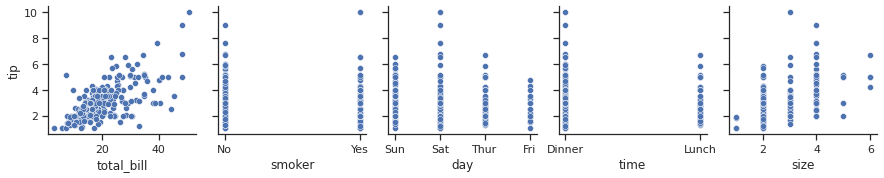

In [29]:
#1.1 Plot the relationship between the response variable and each of the features.
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(data=tips, 
             x_vars=["total_bill", "smoker", "day", "time", "size"],
             y_vars=["tip"])

In [33]:
#data preprocessing
def smoker_to_bullein(x):
  if x == 'No':
    return 0
  elif x == 'Yes':
    return 1
def day_to_num(x):
  if x == 'Sun':
    return 1
  elif x == 'Sat':
    return 2
  elif x == 'Fri':
    return 3
  elif x == 'Thur':
    return 4
def time_to_num(x):
  if x == 'Dinner':
    return 0
  elif x == 'Lunch':
    return 1
tips['smoker'] = tips['smoker'].map(smoker_to_bullein)
tips['day'] = tips['day'].map(day_to_num)
tips['time'] = tips['time'].map(time_to_num)
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,1,0,2
1,10.34,1.66,0,1,0,3
2,21.01,3.50,0,1,0,3
3,23.68,3.31,0,1,0,2
4,24.59,3.61,0,1,0,4
...,...,...,...,...,...,...
239,29.03,5.92,0,2,0,3
240,27.18,2.00,1,2,0,2
241,22.67,2.00,1,2,0,2
242,17.82,1.75,0,2,0,2


In [40]:
#1.2 Divide the data into training data and testing data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = tips[['total_bill']]
X_train, X_test, y_train, y_test = train_test_split(tips[["total_bill", "smoker", "day", "time", "size"]], tips['tip'], random_state=430)
#1.3 Fit a Linear Regression model to the training data.
tip_lr= LinearRegression().fit(X_train, y_train)
#1.4 Use the fitted model to predict the amount of tip
X_new = [[38.99, 0, 1, 0, 2]]
y_predict = tip_lr.predict(X_new)
y_predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([4.32099693])

In [49]:
#1.5 Compute the model's R2 and RMSE
R_square = tip_lr.score(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_predict = tip_lr.predict(X_test)
RMSE_ = mean_squared_error(y_test, y_predict, squared=False)
print("R-squared: {:.2f}".format(R_square), "RMSE: {:.2f}".format(RMSE_))


R-squared: 0.45 RMSE: 1.34


### Exercise 2 (10 points)

- 2.1 Fit a Linear Regression model (with the constant term in the model) to this data using the `OLS` object in [statsmodels](https://www.statsmodels.org/stable/index.html#).
- 2.2 Print out the model summary.
- 2.3 Identify the $R^2$ value and compute RMSE.

In [51]:
# your code
import statsmodels.api as sm
tips_statsmodel = sm.OLS(y_train, X_train)
results = tips_statsmodel.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    tip   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              366.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):                    1.15e-91
Time:                        06:20:32   Log-Likelihood:                         -248.00
No. Observations:                 183   AIC:                                      506.0
Df Residuals:                     178   BIC:                                      522.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill     0.0740      0.010      7.124      0.000       0.053       0.094
smoker        -0.0421      0.150     -0.281      0.779      -0.338       0.254
day            0.1366      0.093      1.467      0.144      -0.047       0.320
time          -0.2380      0.294     -0.811      0.419      -0.817       0.341
size           0.4672      0.088      5.330      0.000       0.294       0.640
==============================================================================
Omnibus:                       10.492   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.226
Skew:                           0.371   Prob(JB):                     0.000814
Kurtosis:                       4.147   Cond. No.                         95.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#2.3 Identify the R2 value and compute RMSE.
#R-square value is 0.911 according to the summary
from statsmodels.tools.eval_measures import rmse

y_predict = results.predict(X_test)
print("R-squared: {:.2f}".format(0.911),"RMSE: {:.2f}".format(rmse(y_test, y_predict)))

R-squared: 0.91 RMSE: 1.29


### Exercise 3 (10 points)

- 3.1 Fit multiple $k$-nearest neighbors models to the data with $k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10$.
- 3.2 For each model, compute the **RMSE** and **$R^2$**.
- 3.3 Plot a line plot of **RMSE** vs. $k$ (x = k, y = RMSE).
- 3.4 Plot a line plot of **$R^2$** vs. $k$ (x = k, y = $R^2$).

In [110]:
# your code
#3.2 For each model, compute the RMSE and R2.
from sklearn.neighbors import KNeighborsRegressor
reg1 = KNeighborsRegressor(n_neighbors=1)
reg1.fit(X_train, y_train)
y_predict1 = reg1.predict(X_test)
print("R-squared1: {:.2f}".format(reg1.score(X_train, y_train)), "RMSE1: {:.2f}".format(mean_squared_error(y_test, y_predict1, squared=False)))
reg2 = KNeighborsRegressor(n_neighbors=2)
reg2.fit(X_train, y_train)
y_predict2 = reg2.predict(X_test)
print("R-squared2: {:.2f}".format(reg2.score(X_train, y_train)), "RMSE2: {:.2f}".format(mean_squared_error(y_test, y_predict2, squared=False)))
reg3 = KNeighborsRegressor(n_neighbors=3)
reg3.fit(X_train, y_train)
y_predict3 = reg3.predict(X_test)
print("R-squared3: {:.2f}".format(reg3.score(X_train, y_train)), "RMSE3: {:.2f}".format(mean_squared_error(y_test, y_predict3, squared=False)))
reg4 = KNeighborsRegressor(n_neighbors=4)
reg4.fit(X_train, y_train)
y_predict4 = reg4.predict(X_test)
print("R-squared4: {:.2f}".format(reg4.score(X_train, y_train)), "RMSE4: {:.2f}".format(mean_squared_error(y_test, y_predict4, squared=False)))
reg5 = KNeighborsRegressor(n_neighbors=5)
reg5.fit(X_train, y_train)
y_predict5 = reg5.predict(X_test)
print("R-squared5: {:.2f}".format(reg5.score(X_train, y_train)), "RMSE5: {:.2f}".format(mean_squared_error(y_test, y_predict5, squared=False)))
reg6 = KNeighborsRegressor(n_neighbors=6)
reg6.fit(X_train, y_train)
y_predict6 = reg6.predict(X_test)
print("R-squared6: {:.2f}".format(reg6.score(X_train, y_train)), "RMSE6: {:.2f}".format(mean_squared_error(y_test, y_predict6, squared=False)))
reg7 = KNeighborsRegressor(n_neighbors=7)
reg7.fit(X_train, y_train)
y_predict7 = reg7.predict(X_test)
print("R-squared7: {:.2f}".format(reg7.score(X_train, y_train)), "RMSE7: {:.2f}".format(mean_squared_error(y_test, y_predict7, squared=False)))
reg8 = KNeighborsRegressor(n_neighbors=8)
reg8.fit(X_train, y_train)
y_predict8 = reg8.predict(X_test)
print("R-squared8: {:.2f}".format(reg8.score(X_train, y_train)), "RMSE8: {:.2f}".format(mean_squared_error(y_test, y_predict8, squared=False)))
reg9 = KNeighborsRegressor(n_neighbors=9)
reg9.fit(X_train, y_train)
y_predict9 = reg9.predict(X_test)
print("R-squared9: {:.2f}".format(reg9.score(X_train, y_train)), "RMSE9: {:.2f}".format(mean_squared_error(y_test, y_predict9, squared=False)))
reg10 = KNeighborsRegressor(n_neighbors=10)
reg10.fit(X_train, y_train)
y_predict10 = reg10.predict(X_test)
print("R-squared10: {:.2f}".format(reg10.score(X_train, y_train)), "RMSE10: {:.2f}".format(mean_squared_error(y_test, y_predict10, squared=False)))


R-squared1: 1.00 RMSE1: 1.32
R-squared2: 0.61 RMSE2: 1.12
R-squared3: 0.42 RMSE3: 1.06
R-squared4: 0.33 RMSE4: 1.01
R-squared5: 0.27 RMSE5: 0.97
R-squared6: 0.24 RMSE6: 0.96
R-squared7: 0.19 RMSE7: 0.96
R-squared8: 0.18 RMSE8: 0.95
R-squared9: 0.16 RMSE9: 0.96
R-squared10: 0.14 RMSE10: 0.95


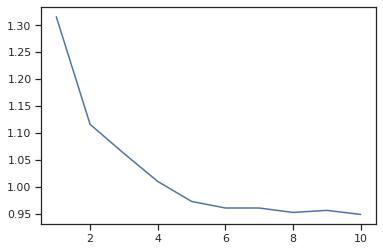

In [111]:
#3.3 Plot a line plot of RMSE vs. k (x = k, y = RMSE)
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [mean_squared_error(y_test, y_predict1, squared=False),mean_squared_error(y_test, y_predict2, squared=False),
     mean_squared_error(y_test, y_predict3, squared=False),mean_squared_error(y_test, y_predict4, squared=False),
     mean_squared_error(y_test, y_predict5, squared=False),mean_squared_error(y_test, y_predict6, squared=False),
     mean_squared_error(y_test, y_predict7, squared=False),mean_squared_error(y_test, y_predict8, squared=False),
     mean_squared_error(y_test, y_predict9, squared=False),mean_squared_error(y_test, y_predict10, squared=False)]
plt.plot(x,y)

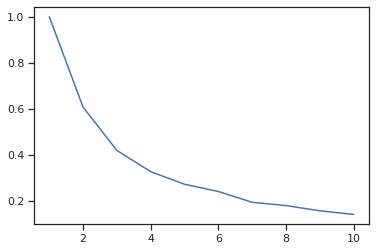

In [112]:
#3.4 Plot a line plot of R2 vs. k (x = k, y = R2)
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [reg1.score(X_train, y_train),reg2.score(X_train, y_train),
     reg3.score(X_train, y_train),reg4.score(X_train, y_train),
     reg5.score(X_train, y_train),reg6.score(X_train, y_train),
     reg7.score(X_train, y_train),reg8.score(X_train, y_train),
     reg9.score(X_train, y_train),reg10.score(X_train, y_train)]
plt.plot(x,y)

***

## 2. Classification

In this section, we will work with the [Breast Cancer Wisconsin (Original) Data Set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)) provided by UCI Machine Learning Repository.

- Load the data using [this link](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data).
- Make sure the columns' dtypes are correct! All of them should be numeric.
    - Hint: look for how missing values are recorded in the dataset description.

In [12]:
# load the data
import pandas as pd
BCW = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names = ['id number','Clump Thickness',
'Uniformity of Cell Size',
'Uniformity of Cell Shape',
'Marginal Adhesion',
'Single Epithelial Cell Size',
'Bare Nuclei',
'Bland Chromatin',
'Normal Nucleoli',
'Mitoses',
'Class'], dtype = {'Clump Thickness':'float64','Uniformity of Cell Size':'float64','Uniformity of Cell Shape':'float64',
                   'Marginal Adhesion':'float64','Single Epithelial Cell Size':'float64','Bare Nuclei':'float64','Bland Chromatin':'float64',
                   'Normal Nucleoli':'float64','Mitoses':'float64'},na_values = '?')
BCW.set_index(['id number'],inplace=True)
BCW

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
id number,,,,,,,,,,
1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2
1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2
1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2
1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2
1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
776715,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2
841769,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2
888820,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4


### Exercise 4 (20 points)

- 4.1 How many observations contain missing data? Which variable contains missing data? Remove observations with missing data!
- 4.2 Divide the data into training data and testing data (set `random_state=430`).
- 4.3 Fit a Logistic Regression model
    - **Treat the features as numeric variables in this exercise!**
- 4.4 Compute the model's training and test accuracy.

In [13]:
# your code
#How many observations contain missing data?
BCW.isnull().sum()
#Which variable contains missing data? - Answer: Bare Nuclei

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [14]:
#Remove observations with missing data
BCW_cleaned = BCW.dropna()
BCW_cleaned

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
id number,,,,,,,,,,
1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2
1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2
1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2
1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2
1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
776715,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2
841769,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2
888820,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4


In [15]:
#4.2 Divide the data into training data and testing data (set random_state=430).
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        BCW_cleaned.loc[:, BCW_cleaned.columns != 'Class'], BCW_cleaned['Class'],
                                        random_state=430)
#4.3 Fit a Logistic Regression model
from sklearn.linear_model import LogisticRegression
logic_reg = LogisticRegression().fit(X_train, y_train)
#4.4 Compute the model's training and test accuracy.
print("Training set accuracy: {:.2f}".format(logic_reg.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(logic_reg.score(X_test, y_test)))

Training set accuracy: 0.97
Test set accuracy: 0.98


### Exercise 5 (20 points)

- 5.1 Fit a Logistic Regression model
    - **Treat the features as ordinal (ordered categorical) variables in this exercise!**
- 5.2 Compute the model's training and test accuracy.

In [26]:
# your code
#5.1 Fit a Logistic Regression model
import pandas as pd
BCW = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names = ['id number','Clump Thickness',
'Uniformity of Cell Size',
'Uniformity of Cell Shape',
'Marginal Adhesion',
'Single Epithelial Cell Size',
'Bare Nuclei',
'Bland Chromatin',
'Normal Nucleoli',
'Mitoses',
'Class'], dtype = {'Clump Thickness':'float64','Uniformity of Cell Size':'float64','Uniformity of Cell Shape':'float64',
                   'Marginal Adhesion':'float64','Single Epithelial Cell Size':'float64','Bare Nuclei':'float64','Bland Chromatin':'float64',
                   'Normal Nucleoli':'float64','Mitoses':'float64'},na_values = '?')
BCW.set_index(['id number'],inplace=True)
#Treat the features as ordinal (ordered categorical) variables in this exercise!
BCW['Clump Thickness'] = BCW['Clump Thickness'].astype('category')
BCW['Uniformity of Cell Size'] = BCW['Uniformity of Cell Size'].astype('category')
BCW['Uniformity of Cell Shape'] = BCW['Uniformity of Cell Shape'].astype('category')
BCW['Marginal Adhesion'] = BCW['Marginal Adhesion'].astype('category')
BCW['Single Epithelial Cell Size'] = BCW['Single Epithelial Cell Size'].astype('category')
BCW['Bare Nuclei'] = BCW['Bare Nuclei'].astype('category')
BCW['Bland Chromatin'] = BCW['Bland Chromatin'].astype('category')
BCW['Normal Nucleoli'] = BCW['Normal Nucleoli'].astype('category')
BCW['Mitoses'] = BCW['Mitoses'].astype('category')

BCW_cleaned = BCW.dropna()
BCW_cleaned = pd.get_dummies(data=BCW_cleaned, drop_first=True)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        BCW_cleaned.loc[:, BCW_cleaned.columns != 'Class'], BCW_cleaned['Class'],
                                        random_state=430)
from sklearn.linear_model import LogisticRegression
logic_reg = LogisticRegression().fit(X_train, y_train)
logic_reg
#5.2 Compute the model's training and test accuracy.
print("Training set accuracy_category: {:.2f}".format(logic_reg.score(X_train, y_train)))
print("Test set accuracy_category: {:.2f}".format(logic_reg.score(X_test, y_test)))

Training set accuracy_category: 0.98
Test set accuracy_category: 0.98


### Exercise 6 (20 points)

- 6.1 Fit multiple $k$-nearest neighbors models to the data with $k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10$.
- 6.2 For each model, compute the training and testing accuracy.
- 6.3 Plot **a single plot** with 2 lines: 1 corresponding to training accuracy, the other corresponding to testing accuracy (the x-axis should be $k$, the y-axis should be percentage).

In [113]:
# your code
#6.2 For each model, compute the training and testing accuracy.
from sklearn.neighbors import KNeighborsClassifier
cleveland_knn1 = KNeighborsClassifier(n_neighbors=1)
cleveland_knn1.fit(X_train, y_train)
print("Training set accuracy1: {:.2f}".format(cleveland_knn1.score(X_train, y_train)), 
      "Test set accuracy1: {:.2f}".format(cleveland_knn1.score(X_test, y_test)))
cleveland_knn2 = KNeighborsClassifier(n_neighbors=2)
cleveland_knn2.fit(X_train, y_train)
print("Training set accuracy2: {:.2f}".format(cleveland_knn2.score(X_train, y_train)), 
      "Test set accuracy2: {:.2f}".format(cleveland_knn2.score(X_test, y_test)))
cleveland_knn3 = KNeighborsClassifier(n_neighbors=3)
cleveland_knn3.fit(X_train, y_train)
print("Training set accuracy3: {:.2f}".format(cleveland_knn3.score(X_train, y_train)), 
      "Test set accuracy3: {:.2f}".format(cleveland_knn3.score(X_test, y_test)))
cleveland_knn4 = KNeighborsClassifier(n_neighbors=4)
cleveland_knn4.fit(X_train, y_train)
print("Training set accuracy4: {:.2f}".format(cleveland_knn4.score(X_train, y_train)), 
      "Test set accuracy4: {:.2f}".format(cleveland_knn4.score(X_test, y_test)))
cleveland_knn5 = KNeighborsClassifier(n_neighbors=5)
cleveland_knn5.fit(X_train, y_train)
print("Training set accuracy5: {:.2f}".format(cleveland_knn5.score(X_train, y_train)), 
      "Test set accuracy5: {:.2f}".format(cleveland_knn5.score(X_test, y_test)))
cleveland_knn6 = KNeighborsClassifier(n_neighbors=6)
cleveland_knn6.fit(X_train, y_train)
print("Training set accuracy6: {:.2f}".format(cleveland_knn6.score(X_train, y_train)), 
      "Test set accuracy6: {:.2f}".format(cleveland_knn6.score(X_test, y_test)))
cleveland_knn7 = KNeighborsClassifier(n_neighbors=7)
cleveland_knn7.fit(X_train, y_train)
print("Training set accuracy7: {:.2f}".format(cleveland_knn7.score(X_train, y_train)), 
      "Test set accuracy7: {:.2f}".format(cleveland_knn7.score(X_test, y_test)))
cleveland_knn8 = KNeighborsClassifier(n_neighbors=8)
cleveland_knn8.fit(X_train, y_train)
print("Training set accuracy8: {:.2f}".format(cleveland_knn8.score(X_train, y_train)), 
      "Test set accuracy8: {:.2f}".format(cleveland_knn8.score(X_test, y_test)))
cleveland_knn9 = KNeighborsClassifier(n_neighbors=9)
cleveland_knn9.fit(X_train, y_train)
print("Training set accuracy9: {:.2f}".format(cleveland_knn9.score(X_train, y_train)), 
      "Test set accuracy9: {:.2f}".format(cleveland_knn9.score(X_test, y_test)))
cleveland_knn10 = KNeighborsClassifier(n_neighbors=10)
cleveland_knn10.fit(X_train, y_train)
print("Training set accuracy10: {:.2f}".format(cleveland_knn10.score(X_train, y_train)), 
      "Test set accuracy10: {:.2f}".format(cleveland_knn10.score(X_test, y_test)))

Training set accuracy1: 1.00 Test set accuracy1: 0.57
Training set accuracy2: 0.81 Test set accuracy2: 0.66
Training set accuracy3: 0.80 Test set accuracy3: 0.60
Training set accuracy4: 0.75 Test set accuracy4: 0.67
Training set accuracy5: 0.74 Test set accuracy5: 0.65
Training set accuracy6: 0.71 Test set accuracy6: 0.67
Training set accuracy7: 0.71 Test set accuracy7: 0.65
Training set accuracy8: 0.69 Test set accuracy8: 0.67
Training set accuracy9: 0.70 Test set accuracy9: 0.65
Training set accuracy10: 0.69 Test set accuracy10: 0.68


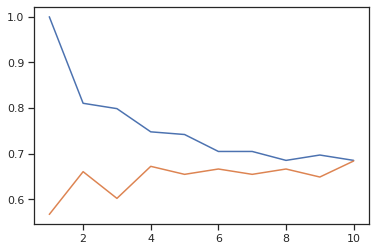

In [116]:
#6.3 Plot a single plot with 2 lines: 1 corresponding to training accuracy, the other corresponding to testing accuracy (the x-axis should be k, the y-axis should be percentage).
import numpy as np
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = np.array([[cleveland_knn1.score(X_train, y_train), cleveland_knn1.score(X_test, y_test)], 
              [cleveland_knn2.score(X_train, y_train), cleveland_knn2.score(X_test, y_test)], 
              [cleveland_knn3.score(X_train, y_train), cleveland_knn3.score(X_test, y_test)], 
              [cleveland_knn4.score(X_train, y_train), cleveland_knn4.score(X_test, y_test)],
              [cleveland_knn5.score(X_train, y_train), cleveland_knn5.score(X_test, y_test)], 
              [cleveland_knn6.score(X_train, y_train), cleveland_knn6.score(X_test, y_test)],
              [cleveland_knn7.score(X_train, y_train), cleveland_knn7.score(X_test, y_test)], 
              [cleveland_knn8.score(X_train, y_train), cleveland_knn8.score(X_test, y_test)],
              [cleveland_knn9.score(X_train, y_train), cleveland_knn9.score(X_test, y_test)], 
              [cleveland_knn10.score(X_train, y_train), cleveland_knn10.score(X_test, y_test)]])

plt.plot(x, y)

### Exercise 7 (20 points)

- 7.1 Load the dataset again (so that the variables are numeric, not categorical). Divide the data into training and testing data (`random_state=430`).
- 7.2 Fit a Decision Tree Regressor to the training data with max depth of 5.
- 7.3 Compute the training and testing accuracy. 
- 7.4 Visualize the tree model.
- 7.5 Plot a graph of the feature importance in the tree model.

In [29]:
# your code
import pandas as pd
from sklearn.model_selection import train_test_split
#7.1 Load the dataset again (so that the variables are numeric, not categorical). Divide the data into training and testing data 
BCW = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names = ['id number','Clump Thickness',
'Uniformity of Cell Size',
'Uniformity of Cell Shape',
'Marginal Adhesion',
'Single Epithelial Cell Size',
'Bare Nuclei',
'Bland Chromatin',
'Normal Nucleoli',
'Mitoses',
'Class'], dtype = {'Clump Thickness':'float64','Uniformity of Cell Size':'float64','Uniformity of Cell Shape':'float64',
                   'Marginal Adhesion':'float64','Single Epithelial Cell Size':'float64','Bare Nuclei':'float64','Bland Chromatin':'float64',
                   'Normal Nucleoli':'float64','Mitoses':'float64'},na_values = '?')
BCW.set_index(['id number'],inplace=True)
BCW_cleaned = BCW.dropna()
X_train, X_test, y_train, y_test = train_test_split(
                                        BCW_cleaned.loc[:, BCW_cleaned.columns != 'Class'], BCW_cleaned['Class'],
                                        random_state=430)
#7.2 Fit a Decision Tree Regressor to the training data with max depth of 5.
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
#7.3 Compute the training and testing accuracy. vv
print("Training set accuracy: {:.3f}".format(
    tree.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(
    tree.score(X_test, y_test)))

Training set accuracy: 0.992
Test set accuracy: 0.953


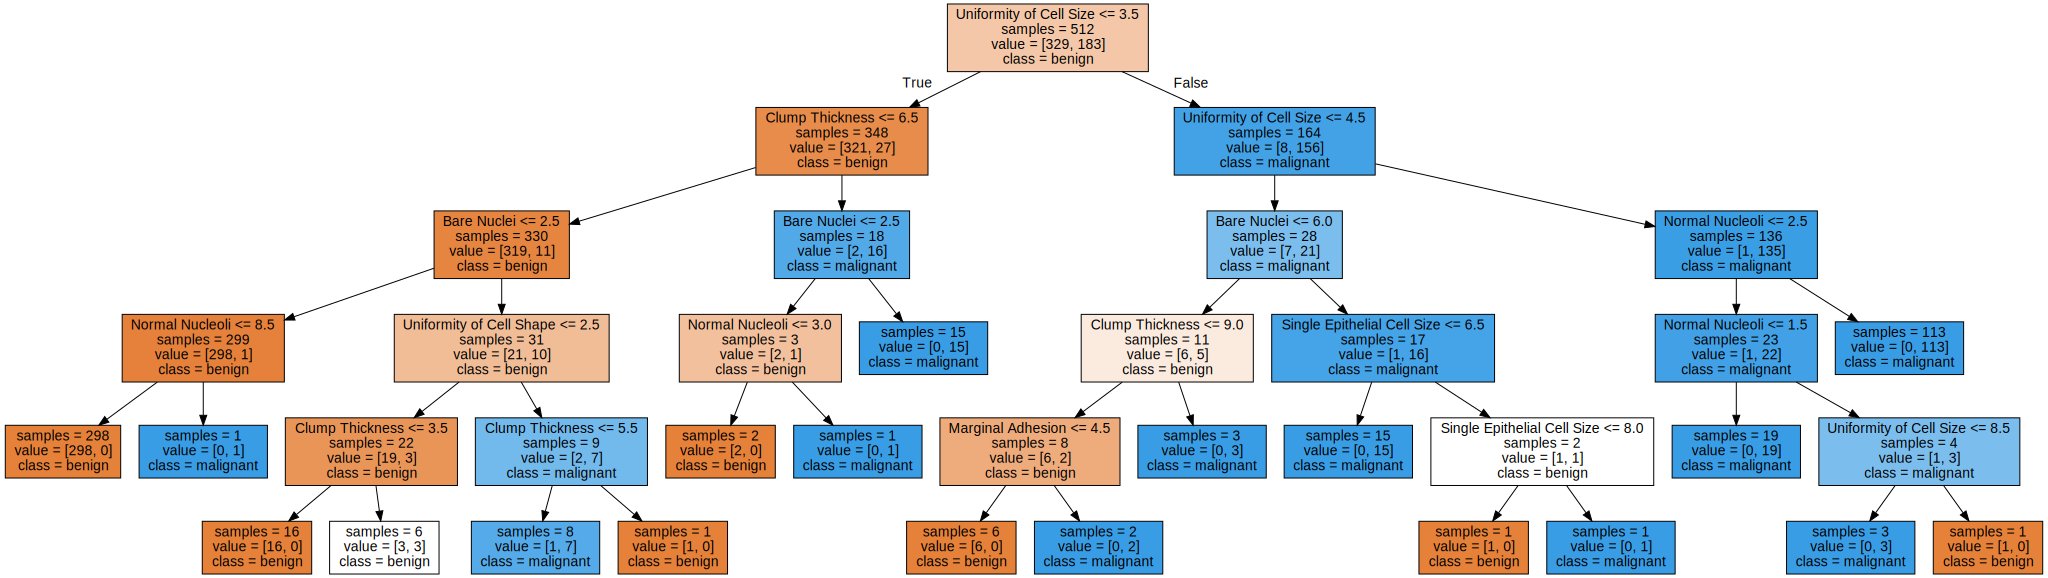

In [34]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["benign", "malignant"], 
                feature_names=BCW_cleaned.columns.delete(9), impurity=False, filled=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

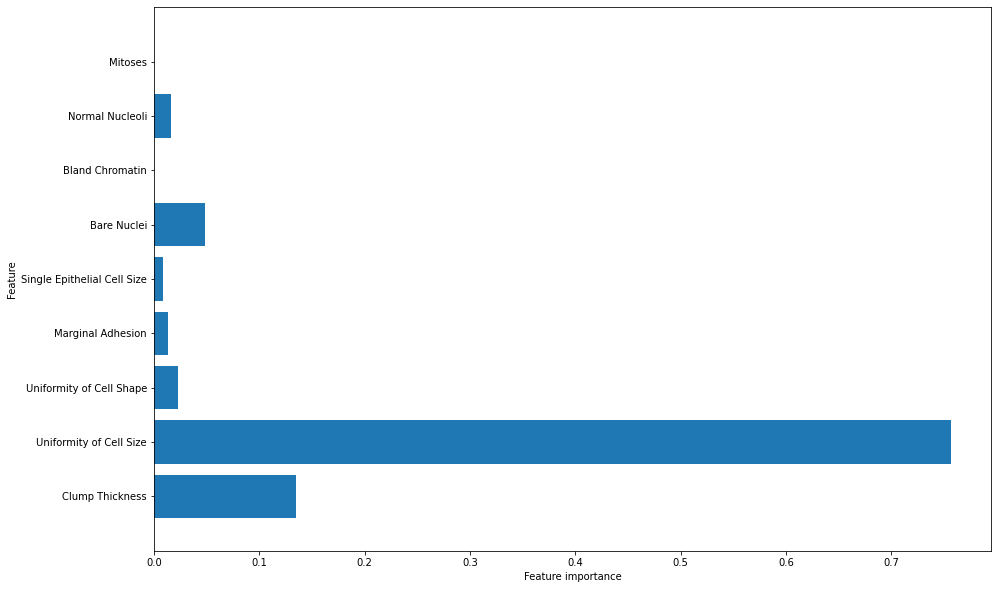

In [36]:
import numpy as np
import matplotlib.pyplot as plt
def plot_feature_importances_cancer(model):
    n_features = BCW_cleaned.shape[1] - 1
    plt.figure(figsize=(15, 10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), BCW_cleaned.columns.delete(9))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

***

## Submit Your Work

You're almost done -- congratulations!

You need to do a few more things:

1. Save your work.  To do this, create a **notebook checkpoint** by using the menu within the notebook to go **File -> Save and Checkpoint**

2. Click **File** -> **Close and Halt** to close this notebook.

3. Click **Logout** on Jupyter to return your terminal back to the command prompt.

4. Follow the assignment instructions to submit this assignment.